In [1]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

In [2]:
def compare(arch):
    dfr=pd.read_csv(f'/home/j/usfq/Proyecto-Integrador/StockPredictionModels/Results/metrics/{arch}_hypothesis.csv')
    dfs=pd.read_csv(f'/home/j/usfq/Proyecto-Integrador/StockPredictionModels/Results/fmetric/{arch}_hypothesis.csv')
    #make a new dataframe with all the rows in dfr that the index ends in 9
    dfr=dfr[dfr.index%10==9]
    ticker=['AAPL','AMZN','GOOG','GOOGL','MSFT','TSLA']
    dfr['ticker']=ticker
    dfs['ticker']=ticker
    #melt the dataframes
    dfr=pd.melt(dfr,id_vars=['ticker'])
    dfs=pd.melt(dfs,id_vars=['ticker'])
    #turn the ticker column into the columns
    dfr=dfr.pivot(index='variable',columns='ticker',values='value')
    dfs=dfs.pivot(index='variable',columns='ticker',values='value')
    #get the average of each row
    dfr['Average']=dfr.mean(axis=1)
    dfs['Average']=dfs.mean(axis=1)

    
    
    return dfr,dfs

import matplotlib.pyplot as plt

# Assuming dfr and dfs are DataFrames with the same index and 'Average' column
def plot_bars(dfr, dfs):
    fig, ax = plt.subplots()

    # Bar width
    bar_width = 0.35
    val=[dfr['Average'][0],dfr['Average'][1],dfr['Average'][2],dfr['Average'][4]]
    vals=[dfs['Average'][0],dfs['Average'][1],dfs['Average'][2],dfs['Average'][4]]

    indexs=[dfr.index.values[0],dfr.index.values[1],dfr.index.values[2],dfr.index.values[4]]
    # Set the x-axis positions for each set of bars
    x_positions_dfr = range(len(dfr.index)-1)
    x_positions_dfs = [x + bar_width for x in x_positions_dfr]

    # Plot bars for DF1
    ax.bar(indexs, val, width=bar_width, color='red', label='Standard')

    # Plot bars for DF2
    ax.bar(x_positions_dfs, vals, width=bar_width, color='blue', label='Noise')

    # Adding labels and title
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Average Values')
    ax.set_title('Average Values for Each Metric - DF1 and DF2')

    # Adding legend
    ax.legend()

    # Display the plot
    plt.show()
# Assuming dfr and dfs are DataFrames with the same index and 'Average' column
def plot_mse(dfr, dfs):
    fig, ax = plt.subplots()

    # Bar width
    bar_width = 0.1
    val=[dfr['Average'][3]]
    vals=[dfs['Average'][3]]

    indexs=[dfr.index.values[3]]
    # Set the x-axis positions for each set of bars
    x_positions_dfr = range(len(dfr.index)-4)
    x_positions_dfs = [x + bar_width for x in x_positions_dfr]

    # Plot bars for DF1
    ax.bar(indexs, val, width=bar_width, color='red', label='Standard')

    # Plot bars for DF2
    ax.bar(x_positions_dfs, vals, width=bar_width, color='blue', label='Noise')

    # Adding labels and title
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Average Values')
    ax.set_title('Average Values for Each Metric - DF1 and DF2')

    # Adding legend
    ax.legend()

    # Display the plot
    plt.show()


In [3]:
allr=[[]]
alls=[[]]

## GRU

In [4]:
dfr,dfs=compare('gru')

In [5]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,2.412359,1.128850,0.832255,0.805350,19.221320,0.748148,4.191380
MAPE,4.033542,1.265088,1.343424,1.299084,15.514237,3.934941,4.565053
MPE,0.824781,0.443830,0.368887,-0.279324,15.514237,-0.399315,2.745516
MSE,8.026194,2.151389,1.240878,1.116118,377.119431,0.966932,65.103490
RMSE,2.833054,1.466761,1.113947,1.056465,19.419563,0.983327,4.478853


In [6]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,2.428778,1.208305,1.028215,0.866007,19.127175,0.840159,4.249773
MAPE,4.054243,1.356515,1.655698,1.395556,15.430499,4.515073,4.734597
MPE,1.136497,0.605172,0.402539,-0.245597,15.430499,-1.732553,2.599426
MSE,8.660538,2.435552,1.618582,1.198487,373.530584,1.112060,64.759301
RMSE,2.942879,1.560626,1.272235,1.094754,19.326939,1.054543,4.541996


## BiGRU

In [7]:
dfr,dfs=compare('bigru')

In [8]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,7.401411,1.950656,4.607709,5.045141,24.288402,0.738603,7.338653
MAPE,14.117508,2.178765,7.931071,8.771216,20.444597,3.870718,9.552313
MPE,14.117508,0.408734,7.931071,8.771216,20.444597,-0.581345,8.515297
MSE,58.536910,6.223950,22.623442,26.575183,600.447913,0.866452,119.212308
RMSE,7.650942,2.494785,4.756411,5.155112,24.504039,0.930834,7.582020


In [9]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,7.418540,2.293479,4.873434,5.279421,24.191742,0.837080,7.482283
MAPE,14.158906,2.601374,8.426699,9.212517,20.345602,4.424281,9.861563
MPE,14.158906,1.041979,8.426699,9.212517,20.345602,-1.306912,8.646465
MSE,58.960572,8.591389,25.463493,29.540568,595.611120,1.069377,119.872753
RMSE,7.678579,2.931107,5.046136,5.435124,24.405145,1.034107,7.755033


## LSTM

In [10]:
dfr,dfs=compare('lstm')

In [11]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,3.025719,1.424037,1.104447,1.596562,15.117441,4.223897,4.415351
MAPE,5.119240,1.606652,1.774330,2.538122,11.784429,19.031036,6.975635
MPE,4.734698,1.071592,-0.448850,-1.921113,11.784429,-16.822736,-0.266997
MSE,13.649819,3.163691,1.986999,4.056692,249.896028,23.735415,49.414774
RMSE,3.694566,1.778677,1.409610,2.014123,15.808100,4.871901,4.929496


In [12]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,3.154269,1.682042,1.224588,1.546192,15.140553,3.859739,4.434564
MAPE,5.353151,1.910258,1.958476,2.459184,11.804764,17.739532,6.870894
MPE,5.008100,1.576217,-0.209760,-1.808395,11.804764,-15.598346,0.128763
MSE,14.781337,4.432506,2.337800,3.811996,250.574345,20.057003,49.332498
RMSE,3.844650,2.105352,1.528987,1.952433,15.829540,4.478505,4.956578


## BiLSTM

In [13]:
dfr,dfs=compare('bilstm')

In [14]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,5.918665,2.239112,0.998267,2.903260,3.032847,1.046032,2.689697
MAPE,10.917059,2.567926,1.609499,4.472192,2.113622,5.487939,4.528039
MPE,10.917059,2.325058,0.122427,-4.396146,1.024305,-1.198868,1.465639
MSE,38.626792,7.271128,1.707927,9.692722,13.817657,1.641497,12.126287
RMSE,6.215046,2.696503,1.306877,3.113314,3.717211,1.281209,3.055027


In [15]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,6.016123,2.637728,1.116289,2.967738,2.979010,1.125648,2.807089
MAPE,11.112969,3.042235,1.790683,4.564497,2.074887,5.968428,4.758950
MPE,11.112969,2.859271,0.430437,-4.504789,0.973532,-2.400530,1.411815
MSE,40.105994,9.751110,1.908511,10.045542,13.354905,1.753821,12.819981
RMSE,6.332929,3.122677,1.381489,3.169470,3.654436,1.324319,3.164220


## TCN

In [16]:
dfr,dfs=compare('tcn')

In [17]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,4.601227,16.096046,1.815050,2.367442,23.592447,2.172404,8.440769
MAPE,8.241638,21.986926,2.884254,3.873394,20.023657,11.165625,11.362582
MPE,8.113419,21.986926,-1.250283,3.162286,20.023657,-5.431228,7.767463
MSE,26.288207,263.794948,5.018771,8.376972,644.399905,5.785419,158.944037
RMSE,5.127203,16.241766,2.240261,2.894300,25.385033,2.405290,9.048975


In [18]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,4.602615,14.911287,2.917869,2.501533,21.659093,2.357461,8.158310
MAPE,8.368558,20.165326,4.785380,4.099810,18.306314,11.921550,11.274489
MPE,8.147373,20.165326,0.810131,3.097308,18.286247,-7.749857,7.126088
MSE,27.471398,232.394050,13.644463,8.875429,584.137308,6.964391,145.581173
RMSE,5.241316,15.244476,3.693841,2.979166,24.168933,2.639013,8.994458


## BiTCN

In [19]:
dfr,dfs=compare('bitcn')

In [20]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,3.346821,4.135664,1.618779,6.288723,41.171684,1.798509,9.726697
MAPE,5.661902,4.902166,2.587357,11.143043,40.612115,9.376141,12.380454
MPE,3.214892,4.541434,-0.119220,11.143043,40.612115,-5.967492,8.904129
MSE,19.092350,22.782309,3.492165,41.800067,1747.748567,4.143603,306.509844
RMSE,4.369479,4.773082,1.868734,6.465297,41.806083,2.035584,10.219710


In [21]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,3.080952,4.665328,1.945032,6.035715,38.747437,1.949536,9.404000
MAPE,5.223484,5.593381,3.103024,10.667203,37.855600,10.017953,12.076774
MPE,1.947728,4.342915,-0.213298,10.667203,37.855600,-6.446347,8.025634
MSE,15.756564,32.652829,5.212930,39.135583,1598.947121,5.060045,282.794179
RMSE,3.969454,5.714265,2.283184,6.255844,39.986837,2.249454,10.076506


## Transformer

In [22]:
dfr,dfs=compare('transformer')

In [23]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,3.737555,4.380876,1.888424,1.492354,7.141121,3.379102,3.669905
MAPE,6.466896,4.626748,3.034307,2.381077,5.209446,16.010076,6.288092
MPE,6.271670,-4.604002,1.041755,-0.641880,5.175684,-14.339172,-1.182657
MSE,19.156343,23.502880,5.279136,3.229861,63.237633,15.104238,21.585015
RMSE,4.376796,4.847977,2.297637,1.797181,7.952209,3.886417,4.193036


In [24]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,3.941175,4.327586,1.871868,1.535201,7.070697,3.453220,3.699958
MAPE,6.856139,4.572733,3.005762,2.446941,5.159644,16.280041,6.386877
MPE,6.781905,-4.558587,1.001418,-0.624191,5.079793,-14.697292,-1.169492
MSE,21.401102,23.029307,5.221543,3.381440,63.528419,15.795336,22.059525
RMSE,4.626133,4.798886,2.285070,1.838869,7.970472,3.974335,4.248961


# Average

In [25]:
allr.pop(0)
allr=np.array(allr)
meanr=np.mean(allr,axis=0)
print(meanr)

[  5.78177898   7.95030967   3.99262713 104.69939369   6.21530247]


In [26]:
alls.pop(0)
alls=np.array(alls)
means=np.mean(alls,axis=0)
print(means)

[ 5.74799667  7.9948779   3.82409993 99.60277264  6.24825023]


In [27]:
dfr['Average']=meanr
dfs['Average']=means

/tmp/ipykernel_907/205350832.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=[dfr['Average'][0],dfr['Average'][1],dfr['Average'][2],dfr['Average'][4]]
/tmp/ipykernel_907/205350832.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vals=[dfs['Average'][0],dfs['Average'][1],dfs['Average'][2],dfs['Average'][4]]


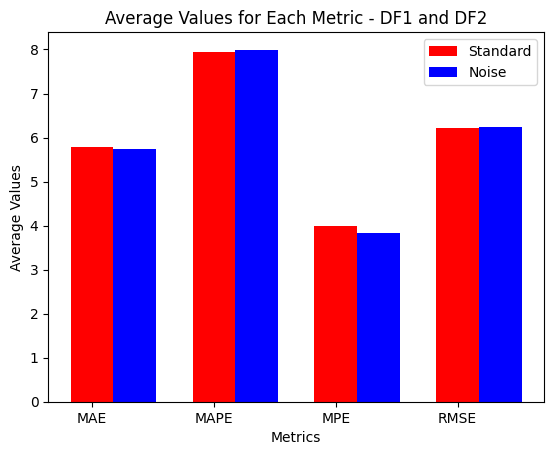

In [28]:
plot_bars(dfr,dfs)

/tmp/ipykernel_907/205350832.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=[dfr['Average'][3]]
/tmp/ipykernel_907/205350832.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vals=[dfs['Average'][3]]


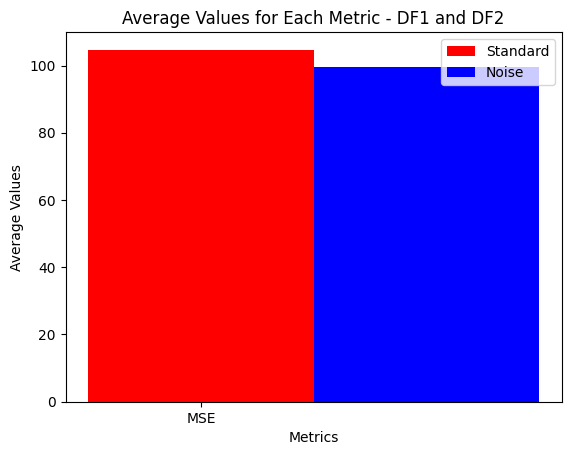

In [29]:
plot_mse(dfr,dfs)

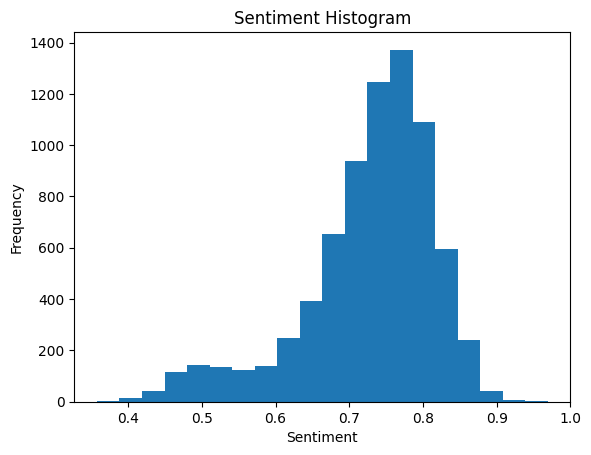

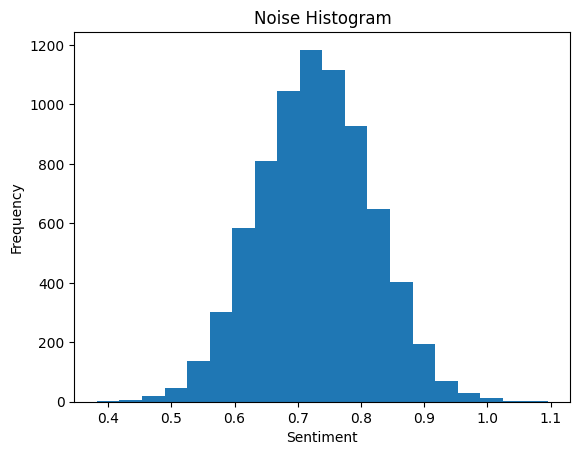

In [30]:
project_path='/home/j/usfq/Proyecto-Integrador/StockPredictionModels'
df=pd.read_csv(project_path+'/Data/Complete.csv')
sent=np.array(df['p_sentiment'])
mean=np.mean(sent)
std=np.std(sent)
noise=np.random.normal(mean,std,len(sent))
dfs=df.copy()
dfs['p_sentiment']=noise

#histogram of the sentiment
plt.hist(df['p_sentiment'],bins=20)
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

#histogram of the noise
plt.hist(dfs['p_sentiment'],bins=20)
plt.title('Noise Histogram')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


In [31]:
fifth_percentile = np.percentile(df['p_sentiment'], 5)
ninety_fifth_percentile = np.percentile(df['p_sentiment'], 95)
print(fifth_percentile)
print(ninety_fifth_percentile)

0.5233656259327335
0.8405815913436909


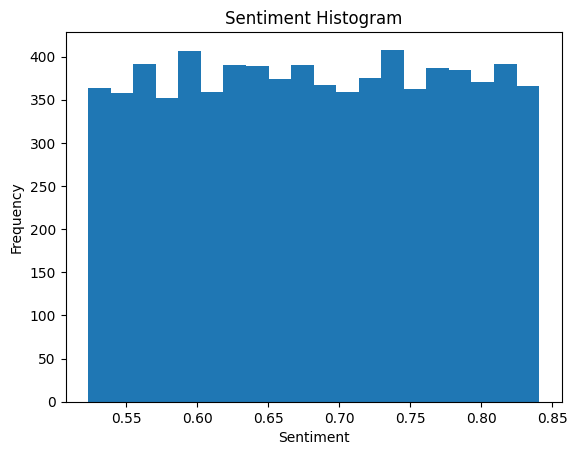

In [32]:
random_numbers = np.random.uniform(0.5233656259327335, 0.8405815913436909,len(sent))
dff=df.copy()
dff['p_sentiment']=random_numbers

#histogram of the sentiment
plt.hist(dff['p_sentiment'],bins=20)
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()